In [1]:
import pandas as pd
import argparse
import random
import time
import os
import duckdb
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from crptmidfreq.config_loc import *
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *
from crptmidfreq.utils.common import to_csv
from crptmidfreq.utils.univ import hardcoded_universe_1
plt.style.use('ggplot')


g_folder = 'res_exploration_v2'
g_reg = StepperRegistry()
clean_folder(g_folder)

/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
2025-04-03 09:28:42 - Cleaning folder res_exploration_v2


In [2]:
unit_day = 60*24
cfg = dict(
        #windows_macd_turnover=[[1_000, 10_000]],
        windows_macd_turnover=[[2*60, 24*60]],

        window_volume_wgt=60*24*30,
        window_volume_univ=60*24*20,

        windows_ewm=[20],

)
defargs = {'folder':g_folder,'name':None,'r':g_reg,'cfg':cfg}
defargs2 = {'folder':g_folder,'name':None,'r':g_reg}
featd=prepare_klines(start_date='2024-09-01',
                   end_date='2026-01-01',
                   #hardcoded_universe_1,#['ETHUSDT','BTCUSDT','BNBUSDT'], # ,'ADAUSDT'
                   tokens=['ETHUSDT','BTCUSDT','SOLUSDT','BNBUSDT'],# ,'ADAUSDT'
                   **defargs)

featd['univ'] = np.ones_like(featd['dtsi'],dtype=np.int64)

# forward_fh1 definition
# and tret_xmkt definition
featd = define_forward_fh(featd,
                        incol='tret',
                        **defargs)

featd['sret']=featd['tret_xmkt']

featd = mr_mual_feats(featd,
                          feats=['sret'],
                          outname='mual',
                          **defargs)


2025-04-03 09:28:43 - Missing key=use_lazy_dict in cfg for kmeans_sret -- will use default value
2025-04-03 09:28:43 - prepare_klines start_date=2024-09-01 end_date=2026-01-01
2025-04-03 09:28:43 - Reading data from DuckDB


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

2025-04-03 09:28:55 - Stepper creating instance res_exploration_v2 None_cnt_exists
2025-04-03 09:28:59 - Stepper creating instance res_exploration_v2 None_close_diff1
2025-04-03 09:28:59 - Stepper creating instance res_exploration_v2 None_tret_clip
2025-04-03 09:29:01 - Stepper creating instance res_exploration_v2 None_turnover_ewm43200
2025-04-03 09:29:01 - Stepper creating instance res_exploration_v2 None_turnover_ewm43200_qtl
2025-04-03 09:29:03 - Missing key=windows_forward in cfg for kmeans_sret -- will use default value
2025-04-03 09:29:03 - Missing key=forward_xmkt in cfg for kmeans_sret -- will use default value
2025-04-03 09:29:03 - Missing key=tret_clip_pct in cfg for pnl_feats -- will use default value
2025-04-03 09:29:03 - Stepper creating instance res_exploration_v2 None_tret_csmeanNonewgt
2025-04-03 09:29:04 - Stepper creating instance res_exploration_v2 None_tret_xmkt_raw_clip
2025-04-03 09:29:06 - Stepper creating instance res_exploration_v2 None_forward_tret_lag-1_csme

In [3]:
df = pd.DataFrame({k: featd[k] for k in featd.keys()})

In [5]:
df.iloc[-1]

close_time                            2025-03-11 23:59:59.999000
dscode                                                         3
close                                                 125.279999
volume                                                    6956.0
taker_buy_volume                                          3295.0
dscode_str                                               SOLUSDT
dtsi                                            1741737599999000
sigf_dscode                                                    3
turnover                                           871447.671509
one                                                          1.0
ipocnt                                                       1.0
sigf_timeofday                                               2.0
sigf_dayofweek                                                 1
close_diff1                                             0.169998
tret                                                    0.001357
tret_qtllow              

close
tret_xmkt
sret
sret_div


KeyError: 'sret_div'

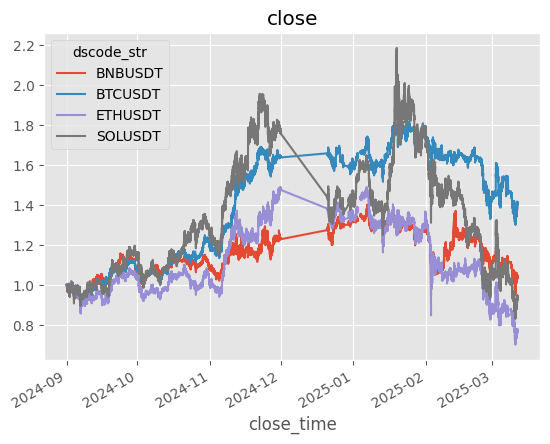

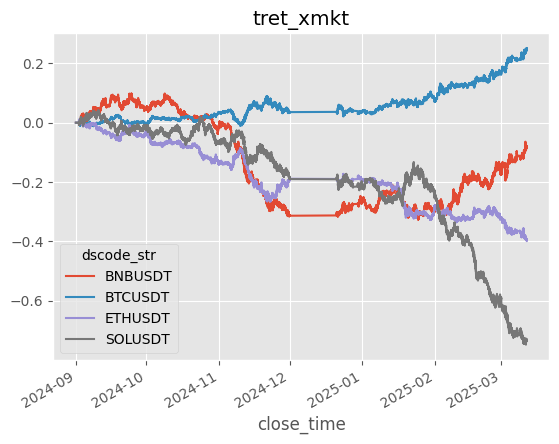

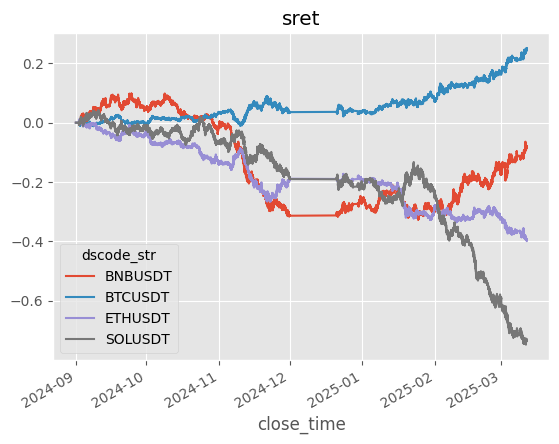

In [4]:

col='close'
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf=pdf/pdf.iloc[0]
pdf.plot(title=col)
col='tret_xmkt'
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf.cumsum().plot(title=col)


col='sret'
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf.cumsum().plot(title=col)

col='sret_div'
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf.cumsum().plot(title=col)


col='sret_mult'
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf.cumsum().plot(title=col)

col=turnover_excess_col
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf.ewm(halflife=100).mean().plot(title=col)

In [1]:
### TIME OF DAY ANALYSIS PLEASE !!!!
